In [2]:
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
# Read in the CSV file and create the Pandas DataFrame
ohlcv_df = pd.read_csv(
    Path("C:/Users/PC2/Documents/project_2/Starter_Data.csv")
)
# Review the DataFrame
ohlcv_df.head()

,date,price_indextor,price_index_change,inflation_rate,canadian_prime_rate,cnd_tsx_indx,unemployment_rate,GDP_growth,CND_USD_exchange
0,2004-10-01,104.9,0.000,0.023,0.043,0.023,0.059,0.065,0.800
1,2004-11-01,105.2,0.003,0.024,0.043,0.018,0.059,0.065,0.835
2,2004-12-01,105.1,-0.001,0.021,0.043,0.024,0.059,0.065,0.824
3,2005-01-01,105.0,-0.001,0.019,0.043,-0.005,0.057,0.064,0.826
4,2005-02-01,105.6,0.006,0.021,0.043,0.050,0.057,0.064,0.806


In [4]:
# Remove white spaces
ohlcv_df.columns = ohlcv_df.columns.str.strip()
ohlcv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 219 non-null    object 
 1   price_indextor       219 non-null    float64
 2   price_index_change   219 non-null    float64
 3   inflation_rate       219 non-null    float64
 4   canadian_prime_rate  219 non-null    float64
 5   cnd_tsx_indx         219 non-null    float64
 6   unemployment_rate    219 non-null    float64
 7   GDP_growth           219 non-null    float64
 8   CND_USD_exchange     219 non-null    float64
dtypes: float64(8), object(1)
memory usage: 15.5+ KB


In [5]:
column_to_scale = ohlcv_df[["price_indextor","price_index_change",	"inflation_rate","canadian_prime_rate",	"cnd_tsx_indx",	"unemployment_rate","GDP_growth","CND_USD_exchange"]]

In [6]:
# Applying Scaler
scaler = StandardScaler()
project4_scaled = scaler.fit_transform(column_to_scale)

In [7]:
project4_scaled

array([[-1.56427223, -0.44523807,  0.14959647, ..., -0.05118592,
         0.4937341 , -0.60419126],
       [-1.54176151,  0.28974035,  0.21756664, ..., -0.05118592,
         0.4937341 , -0.24375098],
       [-1.54926509, -0.69023087,  0.01365611, ..., -0.05118592,
         0.4937341 , -0.35703221],
       ...,
       [ 2.26254993,  1.02471877,  3.27622468, ..., -1.68593609,
         1.71201039, -1.19125581],
       [ 2.29256422,  0.28974035,  3.20825451, ..., -1.68593609,
         1.71201039, -1.32603988],
       [ 2.26254993, -1.18021649,  2.86840361, ..., -1.68593609,
         1.71201039, -1.22595076]])

In [8]:
# Creating a DataFrame with with the scaled data
df_project4_transformed = pd.DataFrame(project4_scaled, columns=["price_indextor","price_index_change",	"inflation_rate","canadian_prime_rate",	"cnd_tsx_indx",	"unemployment_rate","GDP_growth","CND_USD_exchange"])
df_project4_transformed.head() 

,price_indextor,price_index_change,inflation_rate,canadian_prime_rate,cnd_tsx_indx,unemployment_rate,GDP_growth,CND_USD_exchange
0,-1.564272,-0.445238,0.149596,0.651019,0.481037,-0.051186,0.493734,-0.604191
1,-1.541762,0.289740,0.217567,0.651019,0.351586,-0.051186,0.493734,-0.243751
2,-1.549265,-0.690231,0.013656,0.651019,0.506927,-0.051186,0.493734,-0.357032
3,-1.556769,-0.690231,-0.122284,0.651019,-0.243888,-0.284722,0.470748,-0.336436
4,-1.511747,1.024719,0.013656,0.651019,1.180071,-0.284722,0.470748,-0.542402


In [9]:
# Define features set X by selecting all columns but GDP_growth
X = df_project4_transformed.drop(columns=["GDP_growth"]).copy()

# Display the features DataFrame
X.head()

,price_indextor,price_index_change,inflation_rate,canadian_prime_rate,cnd_tsx_indx,unemployment_rate,CND_USD_exchange
0,-1.564272,-0.445238,0.149596,0.651019,0.481037,-0.051186,-0.604191
1,-1.541762,0.289740,0.217567,0.651019,0.351586,-0.051186,-0.243751
2,-1.549265,-0.690231,0.013656,0.651019,0.506927,-0.051186,-0.357032
3,-1.556769,-0.690231,-0.122284,0.651019,-0.243888,-0.284722,-0.336436
4,-1.511747,1.024719,0.013656,0.651019,1.180071,-0.284722,-0.542402


In [10]:
# Define target set by selecting the GDP_growth column
y = df_project4_transformed["GDP_growth"]

# Display a sample of y
y[:5]

0    0.493734
1    0.493734
2    0.493734
3    0.470748
4    0.470748
Name: GDP_growth, dtype: float64

In [11]:
# Split into training and testing windows
from sklearn.model_selection import train_test_split
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [12]:
# Define the model - deep neural net
number_input_features = 7
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 4
hidden_nodes_layer3 = 2

nn = Sequential()

# First hidden layer
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(Dense(units=1, activation="linear"))

In [13]:
# Display the Sequential model summary
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 64        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 113 (452.00 Byte)
Trainable params: 113 (452.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

In [15]:
# Fit the model with validation
history = nn.fit(X, y, validation_split=0.3, epochs=500)

Epoch 1/500
5/5 [==============================] - 3s 166ms/step - loss: 0.5660 - mse: 0.5660 - val_loss: 2.0081 - val_mse: 2.0081
Epoch 2/500
5/5 [==============================] - 0s 30ms/step - loss: 0.5649 - mse: 0.5649 - val_loss: 2.0109 - val_mse: 2.0109
Epoch 3/500
5/5 [==============================] - 0s 34ms/step - loss: 0.5637 - mse: 0.5637 - val_loss: 2.0134 - val_mse: 2.0134
Epoch 4/500
5/5 [==============================] - 0s 31ms/step - loss: 0.5627 - mse: 0.5627 - val_loss: 2.0157 - val_mse: 2.0157
Epoch 5/500
5/5 [==============================] - 0s 31ms/step - loss: 0.5618 - mse: 0.5618 - val_loss: 2.0182 - val_mse: 2.0182
Epoch 6/500
5/5 [==============================] - 0s 33ms/step - loss: 0.5609 - mse: 0.5609 - val_loss: 2.0205 - val_mse: 2.0205
Epoch 7/500
5/5 [==============================] - 0s 32ms/step - loss: 0.5602 - mse: 0.5602 - val_loss: 2.0230 - val_mse: 2.0230
Epoch 8/500
5/5 [==============================] - 0s 35ms/step - loss: 0.5593 - mse: 0.5

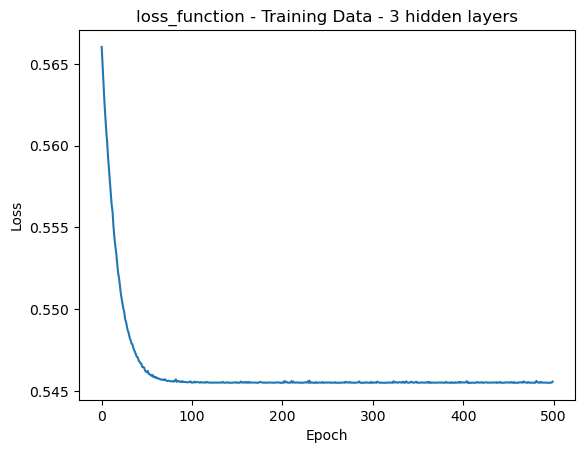

In [16]:
import matplotlib.pyplot as plt

#Train vs test for 2 hidden layers deep net
plt.plot(history.history["loss"])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("loss_function - Training Data - 3 hidden layers")
plt.show()

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [18]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2/2 - 0s - loss: 1.0644 - mse: 1.0644 - 68ms/epoch - 34ms/step
Loss: 1.0644416809082031, Accuracy: 1.0644416809082031
